In [1]:
import pandas as pd

In [2]:
import numpy as np

In [ ]:
# importing data containing wavelength info

In [24]:
file1 = '/Users/feb9528/Desktop/files/10.000kOhm.csv'
file2 = '/Users/feb9528/Desktop/files/12.323kOhm.csv'
file3 = '/Users/feb9528/Desktop/files/14.001kOhm.csv'
file4 = '/Users/feb9528/Desktop/files/16.004kOhm.csv'
file5 = '/Users/feb9528/Desktop/files/18.002kOhm.csv'
file6 = '/Users/feb9528/Desktop/files/20.002kOhm.csv'

In [85]:
df1 = pd.read_csv(file1, skiprows=[0], usecols=[2])
df2 = pd.read_csv(file2, skiprows=[0], usecols=[2])
df3 = pd.read_csv(file3, skiprows=[0], usecols=[2])
df4 = pd.read_csv(file4, skiprows=[0], usecols=[2])
df5 = pd.read_csv(file5, skiprows=[0], usecols=[2])
df6 = pd.read_csv(file6, skiprows=[0], usecols=[2])

In [87]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
df5 = df5.dropna()
df6 = df6.dropna()

In [90]:
lambda1 = df1.values
lambda2 = df2.values
lambda3 = df3.values
lambda4 = df4.values
lambda5 = df5.values
lambda6 = df6.values

In [100]:
# Finding average wavelength of each data run

In [158]:
# append wavelengths to a list
wavelengths = []

In [159]:
avg1 = 0
for i in lambda1:
    avg1 = avg1 + i[0]
    
avg1 = avg1/len(lambda1)
wavelengths.append(avg1)

avg2 = 0
for i in lambda2:
    avg2 = avg2 + i[0]
    
avg2 = avg2/len(lambda2)
wavelengths.append(avg2)

avg3 = 0
for i in lambda3:
    avg3 = avg3 + i[0]
    
avg3 = avg3/len(lambda3)
wavelengths.append(avg3)

avg4 = 0
for i in lambda4:
    avg4 = avg4 + i[0]
    
avg4 = avg4/len(lambda4)
wavelengths.append(avg4)

avg5 = 0
for i in lambda5:
    avg5 = avg5 + i[0]
    
avg5 = avg5/len(lambda5)
wavelengths.append(avg5)

avg6 = 0
for i in lambda6:
    avg6 = avg6 + i[0]
    
avg6 = avg6/len(lambda6)
wavelengths.append(avg6)

In [160]:
len(wavelengths)

6

In [110]:
# list of resistances
res = [10.000, 12.323, 14.001, 16.004, 18.002, 20.002]

In [26]:
# Using the thermistor resistance to temperature forumula from Thorlabs TEC manual and specs of HL6756MG laser

In [138]:
# nominal temperature in Kelvin
T_o = 298.15

# thermistor nominal resistance at nominal temperature in kOhm
R_o = 10

# energy constant/B value in Kelvin
B = 3977

# append temperatures to a list
temps = []

In [139]:
# Converting resistance to temperature and changing temp in Kelvin to Celcius

for i in range(0, len(wavelengths)):
    T_K = (B * T_o)/((T_o * np.log(res[i]/R_o)) + B)
    T_C = T_K - 273.15
    temps.append(T_C)

In [171]:
type(temps[0])

numpy.float64

In [126]:
# Plotting temperature vs wavelength graph

In [162]:
import matplotlib.pyplot as plt
from scipy import stats 

In [173]:
# line fit of data
fit = stats.linregress(wavelengths, temps)

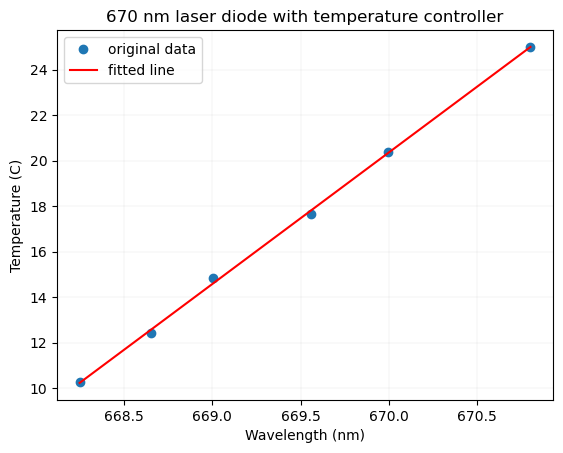

In [192]:
plt.plot(wavelengths, temps, 'o', label='original data')
plt.plot(wavelengths, fit.intercept + fit.slope*np.array(wavelengths), 'r', label='fitted line')
plt.legend()
plt.xlabel('Wavelength (nm)')
plt.ylabel('Temperature (C)')
plt.grid(linewidth=0.1)
plt.title('670 nm laser diode with temperature controller')
# plt.txt? couldn't get it to work
plt.show()

In [201]:
print(fit.slope)

5.7921207387812945
